# Singular Value Decomposition (SVD)

### We'll start off by importing what we need

In [18]:
import numpy as np
import numpy.linalg as npla

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# Sets output floating point value to show only 4 places after dec.pt.
np.set_printoptions(precision = 4)

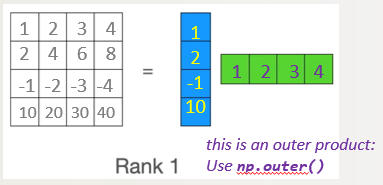

In [19]:
A = np.array([[1,2,3],[-1,-2,-3],[2,4,6]])
print(A,'\n')

v = np.array([1, -1, 2])
h = np.array([1, 2, 3])
vh = np.outer(v,h)
print(vh)

print("\nrres =", npla.norm(vh - A)/npla.norm(A))

[[ 1  2  3]
 [-1 -2 -3]
 [ 2  4  6]] 

[[ 1  2  3]
 [-1 -2 -3]
 [ 2  4  6]]

rres = 0.0


# Singular value decomposition

The singular value decomposition of an arbitrary $m$-by-$n$ matrix $A$ is

$$A = USV^T,$$

where: \
$U$ is an $m$-by-$m$ orthogonal matrix \
($U$'s columns $u_0$, $u_1$, $\ldots$, $u_{m-1}$ all have length 1 and are perpendicular to each other, so that $U^TU=I$);


and $V$ is an $n$-by-$n$ orthogonal matrix \
($V^TV=I$, where now the $v_i$ are columns of $V$ and thus _rows_ of $V^T$);


and $S$ (sometimes written as $\Sigma$) is an $m$-by-$n$ diagonal matrix, whose diagonal elements are $\sigma_0 \ge \sigma_1 \ge \ldots \ge \sigma_{\min(m,n)-1}\ge 0$. \
The $\sigma_i$'s are called the _singular values_ of $A$.

In the next few cells we compute the SVD of a random 8-by-5 matrix. 

In [20]:
A = np.random.rand(8,5)
print('A:\n', A)

A:
 [[0.954  0.8019 0.2564 0.0895 0.7283]
 [0.3118 0.178  0.4056 0.4137 0.9505]
 [0.7117 0.5055 0.5144 0.7385 0.4613]
 [0.3801 0.1852 0.597  0.4685 0.0641]
 [0.1302 0.4899 0.9431 0.0444 0.2785]
 [0.8635 0.6772 0.765  0.4639 0.8011]
 [0.357  0.9031 0.0592 0.3248 0.3058]
 [0.0236 0.0896 0.5992 0.7768 0.4551]]


The numpy routine **npla.svd(A)** returns the three elements of the SVD, but not exactly in the form $A=USV^T$. Instead, npla.svd() returns the matrix $U$, then a vector of the $\min(m-1, n-1)$ singular values, then the matrix $V^T$ (not $V$). In the next cell we use npla.svd() to compute the SVD and then form the actual matrices $U$, $S$, and $V$.

In [21]:
# APPLY SVD to Matrix A:
#    use the full_matrices=False option if your A is not square,
#    otherwise, leave it (it defaults to True)
U,sigma,Vt = npla.svd(A, full_matrices=False) 

nrows, ncols = A.shape
print('shape of A:', (nrows, ncols))

print('shape of U:', U.shape)
print('shape of sigma:', sigma.shape)
print('shape of Vt:', Vt.shape)

print('\nsigma:', sigma)
S = np.diag(sigma)
V = Vt.T

print('\nU:\n', U)
print('\nS:\n', S)
#print('\nS[n]: \n', S[nrows-1])
print('\nV:\n', V)

shape of A: (8, 5)
shape of U: (8, 5)
shape of sigma: (5,)
shape of Vt: (5, 5)

sigma: [3.127  1.1055 0.7609 0.6594 0.5011]

U:
 [[-0.4201  0.5745 -0.0453 -0.1967 -0.2043]
 [-0.3274 -0.1682 -0.5287 -0.5088  0.2081]
 [-0.4124 -0.0761 -0.1357  0.4513 -0.2496]
 [-0.2353 -0.2855  0.2288  0.3269 -0.4051]
 [-0.2759 -0.2383  0.7636 -0.3728  0.2374]
 [-0.5174  0.055   0.0428 -0.1533 -0.2373]
 [-0.2776  0.3815  0.0855  0.45    0.6963]
 [-0.2647 -0.5908 -0.2355  0.1641  0.3018]]

S:
 [[3.127  0.     0.     0.     0.    ]
 [0.     1.1055 0.     0.     0.    ]
 [0.     0.     0.7609 0.     0.    ]
 [0.     0.     0.     0.6594 0.    ]
 [0.     0.     0.     0.     0.5011]]

V:
 [[-0.4713  0.4267 -0.074   0.1255 -0.758 ]
 [-0.45    0.4989  0.3976  0.2654  0.5658]
 [-0.4554 -0.5831  0.6014 -0.263  -0.1473]
 [-0.3632 -0.4778 -0.4168  0.6739  0.1092]
 [-0.4858  0.0278 -0.5487 -0.6249  0.2678]]


In [22]:
n= 9 
print(sigma[n] * np.outer(U[:, n], Vt[n, :]))
norm = A
for i in range(10):
    
    norm = norm - (sigma[i] * np.outer(U[:, i], Vt[i, :]))
    print(norm)
print(npla.norm(norm))

IndexError: index 9 is out of bounds for axis 0 with size 5

In [23]:
#Recall np.eye(n) gives you an identity matrix of size n:

print( np.eye(5) )

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [24]:
# Let's show that U and V are orthonormal (i.e. UT.U = I, etc...)
print('norm of difference between U.T@U and I  :', npla.norm(U.T@U - np.eye(U.shape[1])))
print('norm of difference between V.T@V and I  :', npla.norm(V.T@V - np.eye(Vt.shape[1])))

# Let's compare USVt versus A:
print('relative norm of difference between U@S@V.T and A:', npla.norm(U@S@V.T - A)/npla.norm(A))

norm of difference between U.T@U and I  : 2.701271381552979e-15
norm of difference between V.T@V and I  : 1.6598144790210586e-15
relative norm of difference between U@S@V.T and A: 7.114869435141295e-16


# SVD theorems

We review and illustrate the theorems about SVD.

<h3>Theorem 1. The rank of $A$ is the number of nonzero singular values.</h3>

In our example, sure enough, the matrix $A$ has rank 5.

In [25]:
print('rank(A):', npla.matrix_rank(A))
print('singular values:', sigma)
print('singular values:: length of the vector:', len(sigma))

rank(A): 5
singular values: [3.127  1.1055 0.7609 0.6594 0.5011]
singular values:: length of the vector: 5


In floating-point arithmetic, what counts as "nonzero" can be a judgement call.

To illustrate this, we form a new 8-by-5 matrix $B$ whose first 4 columns are the same as $A$ and whose 5th column is the sum of the first 4 columns. \
Mathematically speaking, $B$ should have **rank 4** because one column is linearly dependent on the other four columns. 

In floating-point arithmetic, though, round-off error makes the last column not quite exactly equal to the sum of the others. The exact rank of this perturbed matrix is 5, and sure enough all of its computed singular values are nonzero. However, because only 4 of the singular values are significantly larger than machine epsilon, we can (and `numpy` does) say that $B$ has "numerical rank" 4.

In [26]:
B = A.copy()
B[:,4] = A @ [1,1,1,1,0]
# this replaces column 4 of B with the sum of the first 4 columns of A,
# making the rank of B less than full

print('A:\n', A)
print('B:\n', B)
print()

UB, sigmaB, VtB = npla.svd(B, full_matrices=False)
print('singular values of B:', sigmaB)
print('singular values of A:', sigma)

# notice that the smallest singular value is approximately roundoff error, 
# so it will be dealt with as if it were zero

# print()
# print('computed numerical rank of B:', npla.matrix_rank(B))
# print('Even though that last element in B is not-strictly zero!!')
# print('After all, the len(sigmaB) is', len(sigmaB))

A:
 [[0.954  0.8019 0.2564 0.0895 0.7283]
 [0.3118 0.178  0.4056 0.4137 0.9505]
 [0.7117 0.5055 0.5144 0.7385 0.4613]
 [0.3801 0.1852 0.597  0.4685 0.0641]
 [0.1302 0.4899 0.9431 0.0444 0.2785]
 [0.8635 0.6772 0.765  0.4639 0.8011]
 [0.357  0.9031 0.0592 0.3248 0.3058]
 [0.0236 0.0896 0.5992 0.7768 0.4551]]
B:
 [[0.954  0.8019 0.2564 0.0895 2.1017]
 [0.3118 0.178  0.4056 0.4137 1.3092]
 [0.7117 0.5055 0.5144 0.7385 2.47  ]
 [0.3801 0.1852 0.597  0.4685 1.6308]
 [0.1302 0.4899 0.9431 0.0444 1.6077]
 [0.8635 0.6772 0.765  0.4639 2.7695]
 [0.357  0.9031 0.0592 0.3248 1.644 ]
 [0.0236 0.0896 0.5992 0.7768 1.4892]]

singular values of B: [6.1356e+00 1.1061e+00 7.2125e-01 5.2196e-01 3.5911e-16]
singular values of A: [3.127  1.1055 0.7609 0.6594 0.5011]


We defined the 2-norm of a matrix early in the course, but we never talked about algorithms to compute it. \
It turns out that the SVD gives us an algorithm for that!

<h3>Theorem 2. The 2-norm $||A||_2$ is equal to the largest singular value $\sigma_0$.</h3>

This is because the norm of $A$ is the largest stretch it applies to any vector, 

$$||A|| = \max_x (||Ax||/||x||).$$


In [27]:
# Let's create a "nice" format to better read floating point numbers:
f = '{0:>12} {1:<1} {2:.4f}'

# Demo to show different .norm() settings...
print(f.format('norm(A)', '=', npla.norm(A)))
print(f.format('norm(A, fro)', '=', npla.norm(A, 'fro')))  # the default, so it should be the same as above
print()
print(f.format('norm(A, 1)', '=', npla.norm(A, 1)))
print(f.format('norm(A, inf)', '=', npla.norm(A, np.inf)))
print(f.format('norm(A, 2)', '=', npla.norm(A, 2)))
print(f.format('sigma_0', '=', sigma[0]))


     norm(A) = 3.5021
norm(A, fro) = 3.5021

  norm(A, 1) = 4.1399
norm(A, inf) = 3.5707
  norm(A, 2) = 3.1270
     sigma_0 = 3.1270


The SVD also gives us a way to compute the condition number of $A$ in the 2-norm, $\kappa_2(A)$.
Recall the definition

$$\kappa(A) = \max(\mbox{stretch}) / \min(\mbox{stretch}),$$

the ratio of the maximum amount any vector is stretched by $A$ to the minimum amount 
any vector is stretched by $A$. 
(The minimum is 0 if $A$ is square and singular, 
or more generally if the rank of $A$ is less than the number of columns,
and in that case the condition number is infinite.
If $A$ is square and nonsingular, the condition number is $||A||.||A^{-1}||.$)

From the discussion of $||A||_2$ above, it is clear that

<h3>Theorem 3. The 2-norm condition number  $\kappa_2(A)$ is equal to the ratio of the largest and smallest singular values,</h3>

$$\kappa_2(A) = \sigma_0 / \sigma_{\min(m,n)-1}$$

In [28]:
# Recall: cond(X) = norm(X)*norm(X^-1)
# BUT THIS ONLY WORKS FOR SQUARE MATRICES!!

X = np.array([[1,2],[3,4]])
print(npla.cond(X,2))
print(npla.norm(X,2)*npla.norm(npla.inv(X),2))

14.933034373659268
14.93303437365925


In [29]:
# Unfortunately numpy's condition number |A||A^-1| doesn't work for non-square matrices!
print('Recall that A =\n', A)

#Example, this won't work:
#print(npla.norm(A,2)*npla.norm(npla.inv(A),2))

# So, instead use this theoretical method instead:
print('\nSigma =', sigma, '\n')
print('ratio of extreme singular values: ', sigma[0]/sigma[-1])
print('2-norm condition number of matrix:', npla.cond(A,2), "   So, they're the same!")

Recall that A =
 [[0.954  0.8019 0.2564 0.0895 0.7283]
 [0.3118 0.178  0.4056 0.4137 0.9505]
 [0.7117 0.5055 0.5144 0.7385 0.4613]
 [0.3801 0.1852 0.597  0.4685 0.0641]
 [0.1302 0.4899 0.9431 0.0444 0.2785]
 [0.8635 0.6772 0.765  0.4639 0.8011]
 [0.357  0.9031 0.0592 0.3248 0.3058]
 [0.0236 0.0896 0.5992 0.7768 0.4551]]

Sigma = [3.127  1.1055 0.7609 0.6594 0.5011] 

ratio of extreme singular values:  6.239923452900975
2-norm condition number of matrix: 6.239923452900976    So, they're the same!


The _Frobenius norm_ of a matrix is the square root of the sum of the squares of all
of its elements. \
It's as if we took the whole $m$-by-$n$ matrix as a vector in $mn$-dimensional space and computed its Euclidean length. This is an easy norm to compute, but actually it shows up more often in theorems than in numerical computation. \
One such theorem is this one:

<h3>Theorem 4. The Frobenius norm $||A||_F$ is equal to $(\sum_i \sigma_i^2)^{1/2}$.</h3>

Let's check it out.

In [30]:
# The smart way...
sumsig = 0
for i in range(len(sigma)):
    sumsig += sigma[i]**2
print('sqrt(sum(singular values)):', np.sqrt(sumsig))

# The long way...
sumsqA = 0
for i in range(nrows):
    for j in range(ncols):
        sumsqA += A[i,j]**2
print('sqrt(sum(matrix elements)):', np.sqrt(sumsqA))

# The "built-in numpy" way...
print('Frobenius norm of matrix:  ', npla.norm(A,'fro'))

sqrt(sum(singular values)): 3.50211673078215
sqrt(sum(matrix elements)): 3.502116730782151
Frobenius norm of matrix:   3.5021167307821512


The determinant of a matrix is important in matrix theory, but is hardly ever computed in numerical linear algebra where matrix norms and condition numbers are more useful. \
However, the SVD does give a way to compute the determinant of a (square) matrix,
up to its sign.

<h3>Theorem 5. The determinant of a square matrix is $\pm$ the product of its singular values, $\prod_i \sigma_i$.</h3>

In [31]:
Asquare = A[:ncols,:]
UAs, sigmaAs, VtAs = npla.svd(Asquare)

print('Asquare =\n', Asquare)
print('\nshape of square matrix:', Asquare.shape)

prodsig = 1
for i in range(len(sigmaAs)):
    prodsig *= sigmaAs[i]
print('product of singular values:', prodsig)

# Compare to...
print('determinant of matrix:  ', npla.det(Asquare))

Asquare =
 [[0.954  0.8019 0.2564 0.0895 0.7283]
 [0.3118 0.178  0.4056 0.4137 0.9505]
 [0.7117 0.5055 0.5144 0.7385 0.4613]
 [0.3801 0.1852 0.597  0.4685 0.0641]
 [0.1302 0.4899 0.9431 0.0444 0.2785]]

shape of square matrix: (5, 5)
product of singular values: 0.09484661135484461
determinant of matrix:   0.09484661135484457


Our final theorem is just a simple way to rewrite the SVD equation $A=USV^T$.
Recall that $u_i$ is column $i$ of $U$ and $v_i$ is column $i$ of $V$, so $v_i^T$ is row $i$ of $V^T$.
It is straightforward to check algebraically that:

<h3>Theorem 6. Matrix $A$ is the sum of rank-1 matrices: $A = \sum_{i=0}^{\min(m,n)}\sigma_i u_i v_i^T$ </h3>

Each term in the sum is a scalar multiple of the outer product $u_i v_i^T$,
which is an $m$-by-$n$ matrix whose rank is 1. \
It's essentially the multiplication table of the elements of $u_i$ (as rows) times
the elements of $v_i$ (as columns).
(Indeed, every matrix product $AB$ can be written as a sum of rank-1 matrices, 
each of which is the outer product of a column of $A$ and a row of $B$.)

**Though it's just a humble algebraic identity, this last theorem actually motivates
the greatest applications of SVD in data analysis, like image compression.**\
We'll see that in the next section, but first let's just check the theorem numerically 
for our example matrix.

We ought to be able to compute $u_i v_i^T$ as `U[:,i] @ V[:,i].T` in `numpy`.
Unfortunately `numpy` is broken here -- it gets confused because it can't tell that `U[:,i]` is a column vector and `V[:,i].T` is a row vector, and it does the wrong thing.


In numpy, we have to use the `np.outer()` function to compute the outer product of two vectors,
as we do below.

In [32]:
Asum = np.zeros(A.shape)

# Go thru the entire sigma - i.e. to max. rank
# Recall that in previous code here we made V = Vt.T

for i in range(len(sigma)):
    Asum += sigma[i] * np.outer(U[:,i], V[:,i])

print('relative norm of difference between Asum and A:',  npla.norm(Asum - A)/npla.norm(A))

relative norm of difference between Asum and A: 7.071700986745208e-16


# SO WHAT?

So, it means that if I can describe an IMAGE as a matrix (say, each entry corresponds to a pixel), then I can describe that image/matrix as a \
***SUM of EASILY-STORED (i.e. Computer Memory) Rank-1 Matrices!***


i.e. like this: \
***M =*** \
$\sigma_0 u_0 v_0^T$  

$+   \sigma_1 u_1 v_1^T$ 

$+   \sigma_2 u_2 v_2^T$ 

$... $

$+ \sigma_n u_n v_n^T$


IF the $\sigma$ terms get smaller and smaller (as we know they do), then the question is:\
***CAN I CUT-OFF THAT SUM AT SOME POINT AND NOT MAKE A BIG DIFFERENCE TO THE TOTAL??***


The answer is: *YES! and that's what helps us, for example, store a large image using less computer memory...*

# Low-rank approximation

What happens if we truncate the sum in Theorem 6 (above) after some number $k<\min(m,n)$ of terms? Let us define

$$A_k = \sum_{i=0}^{k-1}\sigma_i u_i v_i^T,$$

with $A_{\min(m,n)} = A$.
We can think of each rank-1 term $\sigma_i u_i v_i^T$ as adding some "weight" to the matrix, in an informal sense. The terms are added in order of decreasing weight, because $\sigma_0 \ge \sigma_1 \ge \cdots$. If the first singular values are much larger than the later ones, we might hope that $A_k$ would be a good approximation to $A$ for small values of $k$. This turns out to be true in a very strong sense: $A_k$ is the _best_ possible rank-$k$ approximation to $A$, as measured in either the 2-norm or the Frobenius norm.

<h3> Theorem 7. Among all $m$-by-$n$ matrices $B_k$ that have rank $k$, 
the minimum possible value of $||A-B_k||_2$ is attained when $B_k=A_k$ as defined above.
That value is $||A-A_k||_2 = \sigma_{k}$.</h3>

<h3> Theorem 8. Among all $m$-by-$n$ matrices $B_k$ that have rank $k$, 
the minimum possible value of $||A-B_k||_F$ is attained when $B_k=A_k$.
That value is $||A-A_k||_F = (\sum_{i\ge k}\sigma_{k})^{1/2}$. </h3>

For the case $k=0$, we get the results of Theorems 2 and 4 above. 
For $k\ge \mbox{rank}(A)$, we get $A=A_k$.

We illustrate Theorem 7 with our sample 8-by-5 matrix.

In [33]:
A = np.random.rand(10,10)

nrows, ncols = A.shape
print('shape of A:', (nrows, ncols))

U,sigma,Vt = npla.svd(A)

print('singular values:', sigma)
print('rank(A):', npla.matrix_rank(A))
print()

Ak = np.zeros(A.shape)
for k in range(len(sigma)):
    print('rank', npla.matrix_rank(Ak), 'approximation: 2-norm(A%d-A) =' % k, npla.norm(Ak-A,2))
    Ak += sigma[k] * np.outer(U[:,k], Vt[k,:])
print('rank', npla.matrix_rank(Ak), 'approximation: 2-norm(A%d-A) =' % len(sigma), npla.norm(Ak-A,2))


shape of A: (10, 10)
singular values: [5.0737 1.5952 1.3028 1.1924 0.9584 0.7276 0.4893 0.4437 0.299  0.0709]
rank(A): 10

rank 0 approximation: 2-norm(A0-A) = 5.073686084086432
rank 1 approximation: 2-norm(A1-A) = 1.5952042794043395
rank 2 approximation: 2-norm(A2-A) = 1.3028329770824567
rank 3 approximation: 2-norm(A3-A) = 1.1923996260789411
rank 4 approximation: 2-norm(A4-A) = 0.9584127923894039
rank 5 approximation: 2-norm(A5-A) = 0.7275601661670563
rank 6 approximation: 2-norm(A6-A) = 0.48933001625451805
rank 7 approximation: 2-norm(A7-A) = 0.44374807787549525
rank 8 approximation: 2-norm(A8-A) = 0.29901896026645525
rank 9 approximation: 2-norm(A9-A) = 0.070908127845264
rank 10 approximation: 2-norm(A10-A) = 1.5312048866343455e-14


# Image compression using SVD and low-rank approximation

The low-rank approximation theory above is useful in many contexts for summarizing or compressing data. For example, "latent semantic indexing" is a summarization and classification technique for word in documents; you can read more about it at https://en.wikipedia.org/wiki/Latent_semantic_analysis.

Here we will give an example of using SVD to compress the data in an image. We start with a famous photograph of Yosemite by Ansel Adams.

size of matrix M: (1200, 956)



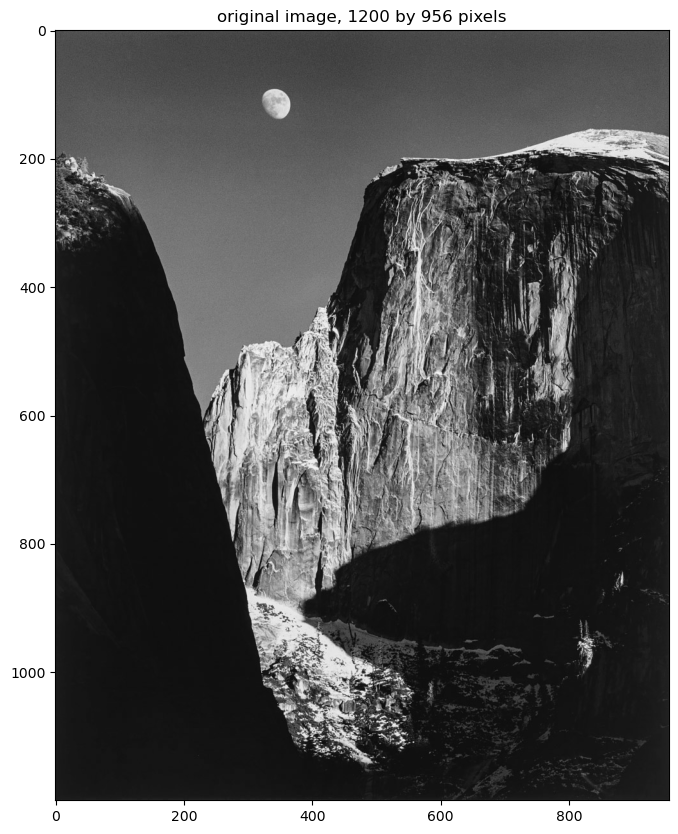

In [34]:
# Read the image from a .jpg file and get just the black intensity of each pixel
adams = plt.imread('halfdome.jpg')
M = np.float64(adams[:,:,0])
nrows, ncols = M.shape
print('size of matrix M:', M.shape)

# plot the original image (matrix)
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(M)
plt.title('original image, %d by %d pixels' % (nrows, ncols))
print()

The matrix $M$ has about a million elements, all independent of each other. Here are a few of them.

In [35]:
nrows, ncols = M.shape
print('Storage needed for all of M:', nrows*ncols)
print()
print('First 5 rows and cols of M:\n', M[:5,:5])

Storage needed for all of M: 1147200

First 5 rows and cols of M:
 [[93. 91. 84. 82. 87.]
 [85. 85. 84. 83. 82.]
 [80. 80. 82. 83. 81.]
 [87. 86. 83. 82. 84.]
 [77. 82. 78. 78. 87.]]


Let's compute the SVD of $M$. We plot the singular values on a log scale.

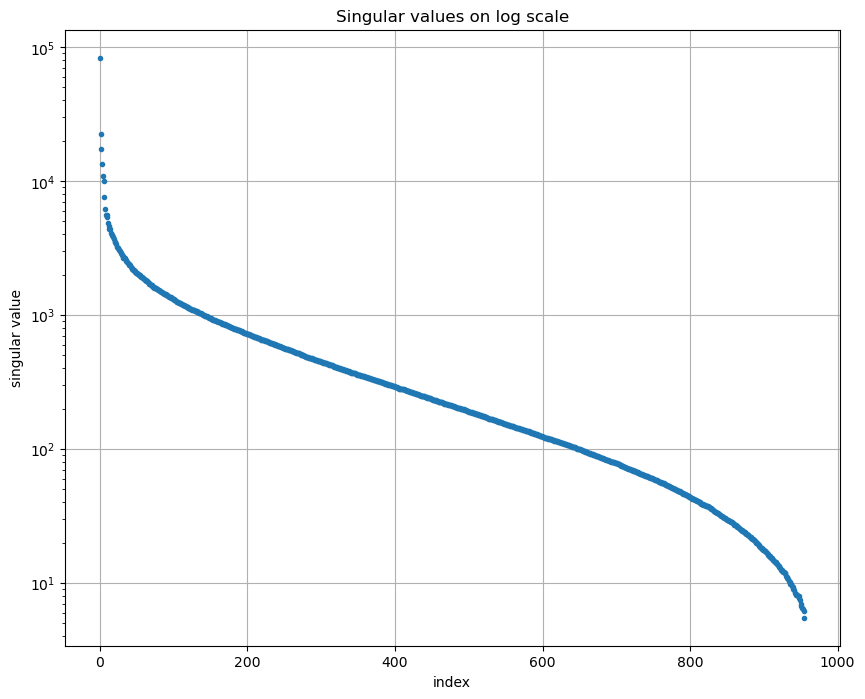

In [36]:
U, sigma, Vt = npla.svd(M, full_matrices=False)

%matplotlib inline
fig0 = plt.figure(figsize=(10,8))
plt.plot(sigma,'.')
plt.yscale('log')
plt.title('Singular values on log scale')
plt.ylabel('singular value')
plt.xlabel('index')
plt.grid()
print()

We notice that the sizes of the singular values drop by two orders of magnitude in the first 150 or so. **That suggests that the rank-150 approximation to $M$ is accurate to within about $1\%$.** 

The advantage of the approximation is that we don't need to store all of $A$!!! \
We can reconstruct the image **if we just store the first 150 vectors $u_i$ and $v_i$** (we can either store the first 150 $\sigma_i$ too, or we can multiply them into the $u_i$'s or $v_i$'s).

Let's try it. We'll also verify that the 2-norms are what Theorem 7 says they should be.

In [58]:
k = 100
# For contrasting results, use k = 15, k = 100
# Max. k = 955

nrows, ncols = M.shape
Mk = np.zeros(M.shape)
for i in range(k):
    Mk += sigma[i] * np.outer(U[:,i], Vt[i,:])
    
print('2-norm(M) =', npla.norm(M,2))
print(' sigma[0] =', sigma[0])
print()
print('2-norm(M%d-M) =' % k, npla.norm(Mk-M, 2))
print('    sigma[%d] =' % k, sigma[k])
print()
print('Relative error =', sigma[k]/sigma[0])
print()

Mstorage = nrows*ncols
Mkstorage = k * (nrows+ncols)

print('Assuming pixel-for-pixel storage:')
print('Storage needed for all of M:', Mstorage)
print('Storage needed for M%d:     ' % k, Mkstorage)
print()
print('Compression factor:', Mstorage/Mkstorage)


2-norm(M) = 218335.7151614038
 sigma[0] = 218335.7151614038

2-norm(M100-M) = 2643.614831074834
    sigma[100] = 2643.6148310748426

Relative error = 0.012108027443519999

Assuming pixel-for-pixel storage:
Storage needed for all of M: 3048192
Storage needed for M100:      352800

Compression factor: 8.64


Finally let's look at the compressed image, which is $M_k$. You see that we do give up some image quality for the compression. 

Try changing the value of $k$ in the cell above, and running this experiment with a few different values to compare. How much can you compress without being able to see the difference between $M$ and $M_k$? At the other end, if you just take $k=1$ or $4$ or $10$ can you see any features of the original image in the compressed version?

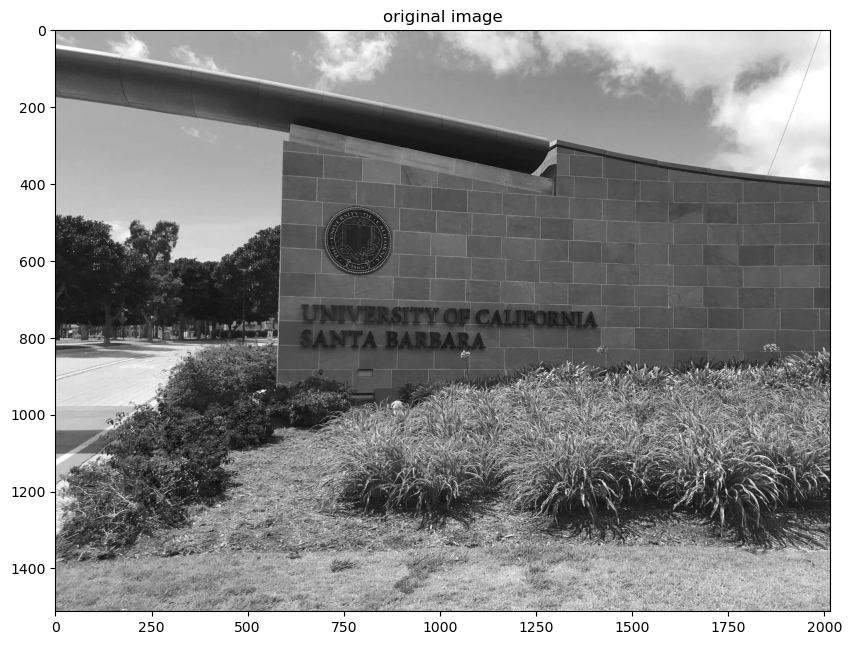

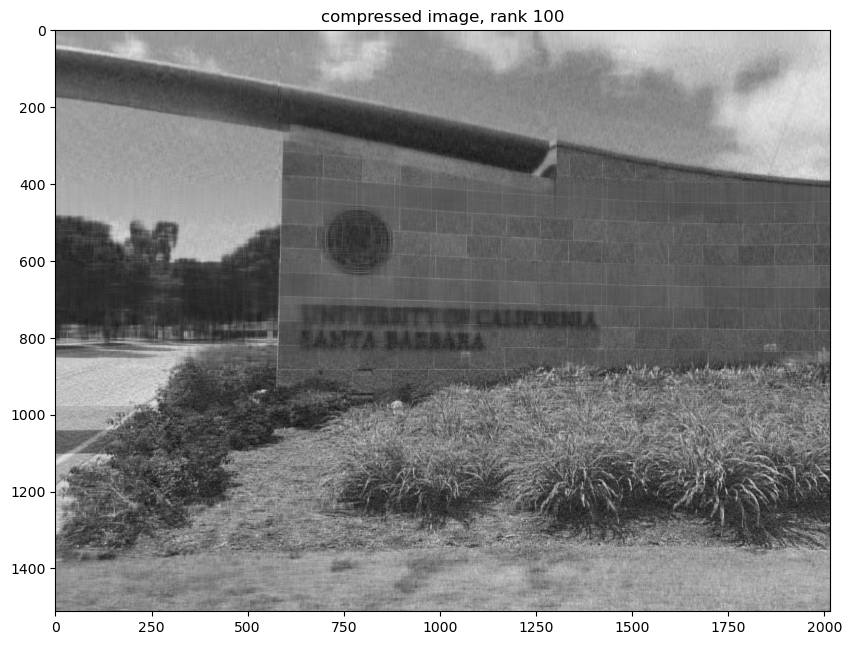

In [59]:
# plot the original image in matrix M
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(M)
plt.title('original image')
print()
          
# plot the compressed image in matrix Mk
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(Mk)
plt.title('compressed image, rank %d' % k)
print()

size of matrix M: (1512, 2016)




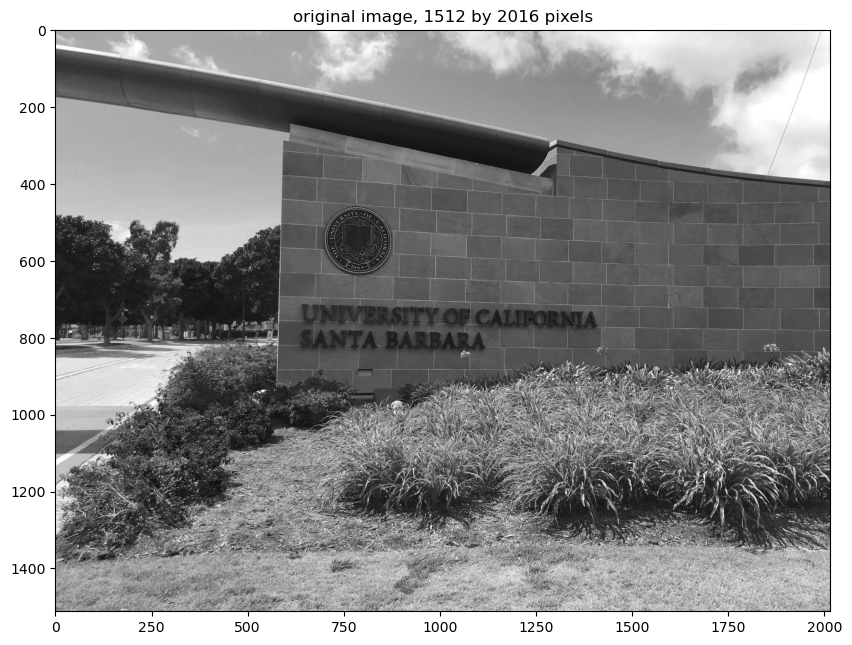

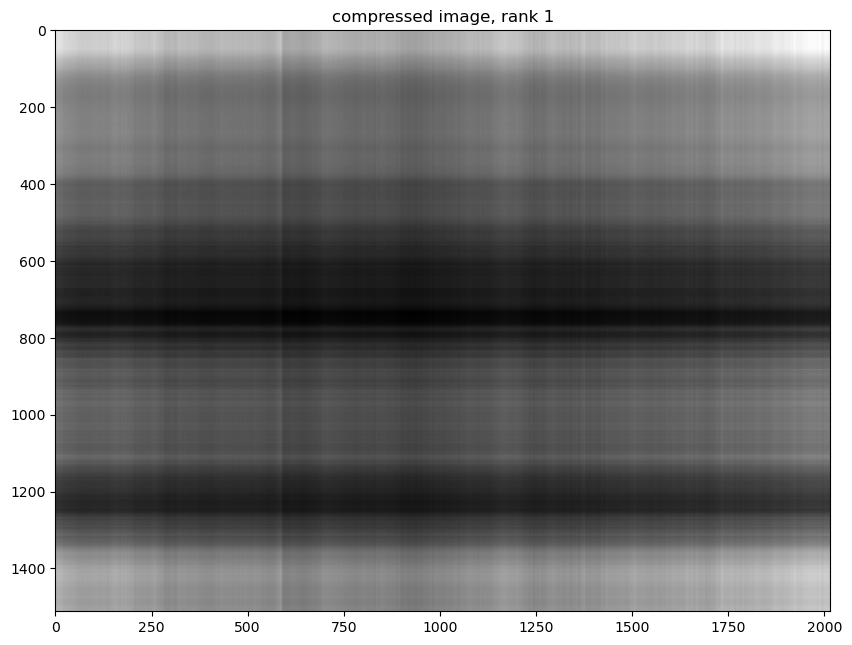

In [60]:
adams = plt.imread('henley.jpg')
M = np.float64(adams[:,:,1])
nrows, ncols = M.shape
print('size of matrix M:', M.shape)

U, sigma, Vt = npla.svd(M, full_matrices=False)

# plot the original image (matrix)
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(M)
plt.title('original image, %d by %d pixels' % (nrows, ncols))
print()

nrows, ncols = M.shape
Mk = np.zeros(M.shape)

k = int(input("Enter k:"))
if(k > nrows or k > ncols):
    k = min(nrows, ncols)

for i in range(k):
    Mk += sigma[i] * np.outer(U[:,i], Vt[i,:])

# plot the compressed image in matrix Mk
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(Mk)
plt.title('compressed image, rank %d' % k)
print() 